**1: Загрузка библиотек и предобратка данных**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel

In [2]:
# Загрузка набора данных
df = pd.read_csv('content/income.csv')

In [3]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [4]:
# Проверка на пропущенные значения
print(df.isnull().sum())

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64


In [5]:
# Удаление строк с пропусками
df_drop = df.dropna()
print("\n# Удаление строк с пропусками")
print(df_drop.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income >50K       0
dtype: int64


In [6]:
df['income >50K'] = df['income >50K'].astype('category')
df['workclass'] = df['workclass'].astype('category')
df['education'] = df['education'].astype('category')
df['marital-status'] = df['marital-status'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['relationship'] = df['relationship'].astype('category')
df['race'] = df['race'].astype('category')
df['sex'] = df['sex'].astype('category')
df['native-country'] = df['native-country'].astype('category')

In [7]:
Y = df['income >50K'] # выбираем целевую переменную (категориальную)
X = df.drop('income >50K', axis=1) # переменные для проверки влияния

In [8]:
X = X.drop(['capital-gain', 'capital-loss'], axis=1)

In [9]:
df.drop('capital-gain', axis=1).info()
df.drop('capital-loss', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       30725 non-null  category
 2   education       32561 non-null  category
 3   education-num   32561 non-null  int64   
 4   marital-status  32561 non-null  category
 5   occupation      30718 non-null  category
 6   relationship    32561 non-null  category
 7   race            32561 non-null  category
 8   sex             32561 non-null  category
 9   capital-loss    32561 non-null  int64   
 10  hours-per-week  32561 non-null  int64   
 11  native-country  31978 non-null  category
 12  income >50K     32561 non-null  category
dtypes: category(9), int64(4)
memory usage: 1.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtyp

In [10]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


**2: масштабирование признаков**

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       30725 non-null  category
 2   education       32561 non-null  category
 3   education-num   32561 non-null  int64   
 4   marital-status  32561 non-null  category
 5   occupation      30718 non-null  category
 6   relationship    32561 non-null  category
 7   race            32561 non-null  category
 8   sex             32561 non-null  category
 9   hours-per-week  32561 non-null  int64   
 10  native-country  31978 non-null  category
dtypes: category(8), int64(3)
memory usage: 1021.6 KB


In [12]:
# Создаем копию данных
X_processed = X.copy()

category_columns: list[str] = X_processed.select_dtypes(include=['category']).columns # собираем колонки помеченные как category

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=category_columns,drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.

In [13]:
X_processed

,age,education-num,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,40,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,50,13,13,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,9,40,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,7,40,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,13,40,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,38,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,40,9,40,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,58,9,40,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,22,9,20,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [14]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])

In [15]:
X_processed

,age,education-num,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.301370,0.800000,0.397959,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,0.452055,0.800000,0.122449,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.287671,0.533333,0.397959,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.493151,0.400000,0.397959,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0.150685,0.800000,0.397959,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.733333,0.377551,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,0.315068,0.533333,0.397959,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,0.561644,0.533333,0.397959,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,0.068493,0.533333,0.193878,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


**3: Очистка данных и удаление выбросов**

**Функция обучения с оценкой качества**

In [16]:
from sklearn.model_selection import cross_val_score

def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model

In [17]:
train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.8362
Точность на тестовой выборке: 0.8359

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4945
           1       0.70      0.56      0.62      1568

    accuracy                           0.84      6513
   macro avg       0.78      0.74      0.76      6513
weighted avg       0.83      0.84      0.83      6513



LogisticRegression(max_iter=1000)

**Метод 1: удаление на основе медианы**

In [18]:
# Функция для удаления выбросов на основе межквартильного размаха (1.5 IQR)
def remove_outliers_based_on_iqr(X, y, iqr_multiplier=1.5):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем первый и третий квартили для каждой числовой переменной
    Q1 = X_numeric.quantile(0.25)
    Q3 = X_numeric.quantile(0.75)

    # Вычисляем межквартильный размах (IQR)
    IQR = Q3 - Q1

    # Оставляем только те значения, которые находятся в диапазоне [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    X_filtered = X_numeric[~((X_numeric < (Q1 - iqr_multiplier * IQR)) | (X_numeric > (Q3 + iqr_multiplier * IQR))).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered

In [19]:
X_iqr, y_iqr = remove_outliers_based_on_iqr(X_processed, Y, iqr_multiplier=3)

In [20]:
X_processed.describe()

,age,education-num,hours-per-week
count,32561.000000,32561.000000,32561.000000
mean,0.295639,0.605379,0.402423
std,0.186855,0.171515,0.125994
min,0.000000,0.000000,0.000000
25%,0.150685,0.533333,0.397959
50%,0.273973,0.600000,0.397959
75%,0.424658,0.733333,0.448980
max,1.000000,1.000000,1.000000


In [21]:
X_iqr.describe()

,age,education-num,hours-per-week
count,28182.000000,28182.000000,28182.000000
mean,0.296744,0.609167,0.417667
std,0.173860,0.170356,0.072932
min,0.000000,0.000000,0.244898
25%,0.150685,0.533333,0.397959
50%,0.273973,0.600000,0.397959
75%,0.410959,0.800000,0.448980
max,1.000000,1.000000,0.602041


In [22]:
train_and_evaluate(X_iqr, y_iqr)

Точность на обучающей выборке: 0.7792
Точность на тестовой выборке: 0.7861

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      4194
           1       0.65      0.36      0.46      1443

    accuracy                           0.79      5637
   macro avg       0.73      0.65      0.66      5637
weighted avg       0.77      0.79      0.76      5637



LogisticRegression(max_iter=1000)

Все значения после удаления выбросов стали меньше. Как точность, так и показатели классификационного отчёта. Возможно это связано с тем, что удалились какие-то важдые данные или модель обучилась как-то не так.

**Метод 2: удаление на основе среднего**

In [23]:
# Функция для удаления выбросов на основе среднего значения

def remove_outliers_based_on_mean(X, y, mean_multiplier=2):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем среднее значение и стандартное отклонение для каждой переменной
    mean_values = X_numeric.mean()
    std_values = X_numeric.std()

    # Устанавливаем верхний и нижний пороги на основе среднего значения и множителя стандартного отклонения
    lower_threshold = mean_values - mean_multiplier * std_values
    upper_threshold = mean_values + mean_multiplier * std_values

    # Фильтруем наблюдения, которые находятся в пределах этих порогов по всем признакам
    X_filtered = X_numeric[~((X_numeric < lower_threshold) | (X_numeric > upper_threshold)).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered

In [24]:
X_mean, y_mean = remove_outliers_based_on_mean(X_processed.copy(), Y.copy())

In [25]:
X_processed.describe()

,age,education-num,hours-per-week
count,32561.000000,32561.000000,32561.000000
mean,0.295639,0.605379,0.402423
std,0.186855,0.171515,0.125994
min,0.000000,0.000000,0.000000
25%,0.150685,0.533333,0.397959
50%,0.273973,0.600000,0.397959
75%,0.424658,0.733333,0.448980
max,1.000000,1.000000,1.000000


In [26]:
X_mean.describe()

,age,education-num,hours-per-week
count,28181.000000,28181.000000,28181.000000
mean,0.277337,0.619157,0.407678
std,0.163828,0.142669,0.090630
min,0.000000,0.266667,0.153061
25%,0.136986,0.533333,0.397959
50%,0.260274,0.600000,0.397959
75%,0.397260,0.733333,0.448980
max,0.657534,0.933333,0.653061


In [27]:
train_and_evaluate(X_mean, y_mean)

Точность на обучающей выборке: 0.7843
Точность на тестовой выборке: 0.7882

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      4247
           1       0.63      0.33      0.44      1390

    accuracy                           0.79      5637
   macro avg       0.72      0.64      0.65      5637
weighted avg       0.77      0.79      0.76      5637



LogisticRegression(max_iter=1000)

Тут модель, по сравнению с методом медианы, похожий результат, хоть и слегка повысилась точность.

**3: Методы отбора признаков**

In [28]:
from sklearn.feature_selection import SelectKBest, f_regression

In [29]:
# Применяем SelectKBest для выбора 5 лучших признаков
selector = SelectKBest(score_func=f_regression, k=94)
X_kbest = selector.fit_transform(X_processed, Y)

In [30]:
selector.scores_

array([1.88670731e+03, 4.12009578e+03, 1.81338628e+03, 3.56907276e+01,
       2.22084039e+00, 2.02027095e+02, 6.45865197e+02, 2.93667982e+01,
       7.17508639e+00, 4.44293926e+00, 2.41827820e+02, 6.51573395e+01,
       3.88986528e+01, 6.85190156e+01, 1.15770564e+02, 1.01574622e+02,
       3.43969288e-01, 3.28741965e+00, 1.09632178e+03, 5.82472539e+02,
       5.70167351e+02, 1.02340997e+03, 1.62092682e+01, 8.00498796e+02,
       1.31964554e+02, 4.73728558e+00, 8.02584206e+03, 5.90037946e+01,
       3.67420015e+03, 1.81161488e+02, 1.35517096e+02, 8.28308340e-01,
       5.14992482e+00, 1.57584840e+03, 8.80224973e+01, 2.49846128e+02,
       1.57577144e+02, 8.15835009e+02, 4.49284954e+01, 1.16503429e+03,
       2.57630816e+01, 1.82800670e+01, 2.15128700e+01, 1.50239826e+01,
       1.19948134e+03, 2.29798715e+02, 1.79415749e+03, 6.78313649e+02,
       5.02330558e+02, 3.61965297e+00, 2.60480975e+02, 3.30205178e+01,
       2.38213210e+02, 1.59310791e+03, 4.41339793e+00, 2.74900314e-01,
      

In [31]:
X_processed.columns

Index(['age', 'education-num', 'hours-per-week', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupati

In [32]:
X_processed

,age,education-num,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.301370,0.800000,0.397959,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,0.452055,0.800000,0.122449,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.287671,0.533333,0.397959,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.493151,0.400000,0.397959,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0.150685,0.800000,0.397959,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.733333,0.377551,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,0.315068,0.533333,0.397959,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,0.561644,0.533333,0.397959,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,0.068493,0.533333,0.193878,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [33]:
selector = SelectKBest(score_func=chi2, k=10)

In [34]:
X_kbest = selector.fit_transform(X_processed, Y)

In [35]:
selector.scores_

array([2.10621483e+02, 1.77725050e+02, 6.77615178e+01, 3.33620312e+01,
       2.22034790e+00, 6.08343959e+01, 6.11634199e+02, 2.70523309e+01,
       6.88796659e+00, 4.44069579e+00, 2.31396842e+02, 6.41664084e+01,
       3.86541499e+01, 6.76800107e+01, 1.13078607e+02, 9.96664007e+01,
       3.32714590e-01, 3.14776588e+00, 8.86235182e+02, 5.65011925e+02,
       3.79662176e+02, 9.39775218e+02, 1.61768204e+01, 7.67516147e+02,
       1.02008134e+02, 4.73354139e+00, 3.47751588e+03, 5.81445444e+01,
       2.21852198e+03, 1.74498489e+02, 1.30847740e+02, 8.28109192e-01,
       4.50118184e+00, 1.31548263e+03, 8.51105541e+01, 2.37525897e+02,
       1.47185322e+02, 7.15396117e+02, 4.46640162e+01, 9.81835068e+02,
       2.52311627e+01, 1.62228098e+01, 2.08872285e+01, 1.42813979e+01,
       8.61846218e+02, 2.21326908e+02, 1.43587302e+03, 5.94184659e+02,
       4.70904550e+02, 3.50397794e+00, 2.33634971e+02, 3.27145265e+01,
       3.44639551e+01, 5.02439419e+02, 4.39667142e+00, 2.74281649e-01,
      

In [36]:
X_processed.columns

Index(['age', 'education-num', 'hours-per-week', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupati

In [37]:
selector.get_support(indices=True)

array([18, 21, 23, 26, 28, 33, 37, 39, 44, 46])

In [38]:
# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support(indices=True)]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['education_Bachelors', 'education_Masters', 'education_Prof-school',
       'marital-status_Married-civ-spouse', 'marital-status_Never-married',
       'occupation_Exec-managerial', 'occupation_Other-service',
       'occupation_Prof-specialty', 'relationship_Not-in-family',
       'relationship_Own-child'],
      dtype='object')


In [39]:
# Преобразуем X_kbest в DataFrame
X_kbest_df = pd.DataFrame(X_kbest, columns=selected_features)

In [40]:
# Обучаем и оцениваем модель
train_and_evaluate(X_kbest_df, Y)

Точность на обучающей выборке: 0.8236
Точность на тестовой выборке: 0.8231

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4945
           1       0.67      0.52      0.59      1568

    accuracy                           0.82      6513
   macro avg       0.76      0.72      0.74      6513
weighted avg       0.81      0.82      0.81      6513



LogisticRegression(max_iter=1000)

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Инициализируем модель логистической регрессии
base_model = LogisticRegression(max_iter=1000)

# Инициализируем RFE для выбора 5 лучших признаков
rfe = RFE(estimator=base_model, n_features_to_select=5)
rfe.fit(X_processed, Y)

# Получаем список отобранных признаков
selected_features = X_processed.columns[rfe.support_]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['age', 'education-num', 'hours-per-week',
       'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse'],
      dtype='object')


In [42]:
# Отбираем признаки
X_rfe = X_processed[selected_features]

# Обучаем и оцениваем модель
model = train_and_evaluate(X_rfe, Y)

Точность на обучающей выборке: 0.8205
Точность на тестовой выборке: 0.8204

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      4945
           1       0.67      0.50      0.57      1568

    accuracy                           0.82      6513
   macro avg       0.76      0.71      0.73      6513
weighted avg       0.81      0.82      0.81      6513



Коэффициенты модели без регуляризации: [[ 1.92363545e+00  2.21911590e+00  2.92230968e+00 -2.00368083e-01
  -1.56195043e-01 -1.50922154e-04  2.55333274e-01 -4.58145748e-01
  -3.77513286e-01 -9.11430355e-01 -1.37771886e-01  1.32197713e-01
  -5.49735214e-03  1.81454519e-01 -2.82137615e-01 -2.37134167e-01
   4.12395713e-01  5.69506650e-01  8.83996993e-01  1.52537105e+00
   3.04515160e-01  1.12322215e+00 -6.34006994e-01  1.57420079e+00
   5.16286653e-01  1.57117719e+00  1.78710458e+00 -6.51655046e-02
  -4.91298503e-01 -1.46483728e-01  1.07851787e-01 -8.20429927e-02
   2.37057276e-01  9.76332031e-01 -7.75441010e-01 -5.31376522e-01
  -1.53940638e-01 -7.30436542e-01 -1.33395967e+00  7.08402876e-01
   7.00328755e-01  4.51105248e-01  7.98282068e-01  2.85586713e-02
   3.02183194e-01 -4.87421912e-01 -9.40258690e-01  8.85142285e-02
   1.34376015e+00  5.95371362e-01  4.17615385e-01  9.32885270e-02
   4.89885760e-01  8.38730214e-01  3.70570281e-01 -5.15891841e-01
  -1.44198410e+00  4.03092942e-01 -8.

/opt/jupyterhub/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Коэффициенты модели после отбора признаков: [[ 1.96589258e+00  4.08774077e+00  3.00084752e+00 -1.89556324e-01
   3.21748237e-03  2.39281692e-01 -4.57702800e-01 -3.68548440e-01
  -1.16000857e+00 -1.92808857e-01 -1.47134283e-02  2.85077172e-01
   4.24070434e-01 -2.85124002e-02 -2.61830317e-01  6.57605266e-02
   3.16881786e-01 -1.42356329e-02  1.79866505e-01  5.09223278e-01
   7.14565967e-02  2.01036419e+00  1.82583715e+00 -2.04456686e-02
  -4.63906355e-01 -1.12871480e-01  9.91384546e-02  2.39695549e-01
   9.78337578e-01 -7.86370762e-01 -5.17284743e-01 -1.41478818e-01
  -7.41054046e-01 -1.57913403e+00  7.06606373e-01  6.93450903e-01
   4.54251260e-01  7.98902916e-01  2.77847122e-02  3.18067104e-01
  -4.59418470e-01 -9.16533102e-01  1.12875523e-01  1.33991180e+00
   4.18567517e-01  2.79768556e-01 -3.32628291e-02  3.61514009e-01
   8.28364432e-01  3.56271300e-01 -4.38583872e-01 -1.52698135e+00
   3.60344153e-01 -7.72016516e-01  3.73745751e-01  4.08412024e-01
   5.06064443e-01 -2.81873779e-0

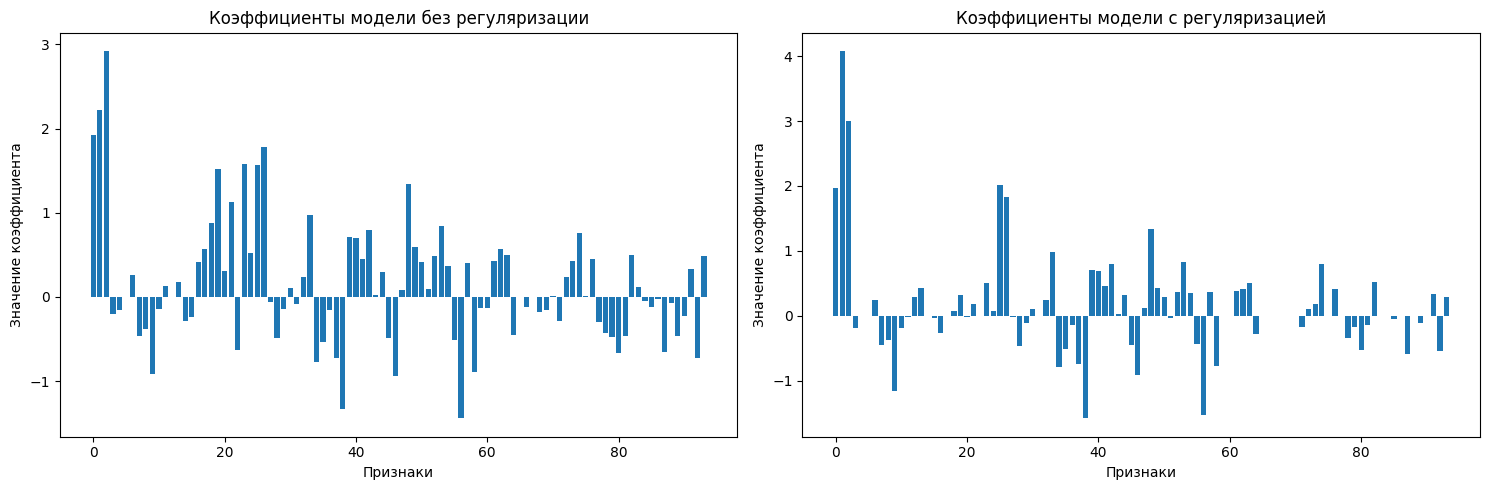

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt

# Обучаем модель без регуляризации
model_no_penalty = LogisticRegression(solver='lbfgs', max_iter=1000)
model_no_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели без регуляризации
coefficients_no_penalty = model_no_penalty.coef_
print("Коэффициенты модели без регуляризации:", coefficients_no_penalty)

# Инициализируем модель с L1-регуляризацией
model_with_penalty = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Обучаем модель с регуляризацией
model_with_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели с регуляризацией
coefficients_with_penalty = model_with_penalty.coef_
print("Коэффициенты модели с регуляризацией:", coefficients_with_penalty)

# Используем SelectFromModel для отбора признаков
selector = SelectFromModel(model_with_penalty, prefit=True)
X_embedded = selector.transform(X_processed)

# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support()]
print("Отобранные признаки:", selected_features)

# Обучаем модель на отобранных признаках
model_embedded = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_embedded.fit(X_embedded, Y)

# Выводим коэффициенты модели после отбора признаков
coefficients_embedded = model_embedded.coef_
print("Коэффициенты модели после отбора признаков:", coefficients_embedded)

# Визуализация коэффициентов моделей
plt.figure(figsize=(15, 5))

# Коэффициенты модели без регуляризации
plt.subplot(1, 2, 1)
plt.bar(range(len(coefficients_no_penalty[0])), coefficients_no_penalty[0])
plt.title("Коэффициенты модели без регуляризации")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

# Коэффициенты модели с регуляризацией
plt.subplot(1, 2, 2)
plt.bar(range(len(coefficients_with_penalty[0])), coefficients_with_penalty[0])
plt.title("Коэффициенты модели с регуляризацией")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

plt.tight_layout()
plt.show()

In [44]:
# Преобразуем X_embedded в DataFrame
X_embedded_df = pd.DataFrame(X_embedded, columns=selected_features)

# Обучаем и оцениваем модель
model = train_and_evaluate(X_embedded_df, Y)

Точность на обучающей выборке: 0.8357
Точность на тестовой выборке: 0.8354

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4945
           1       0.70      0.56      0.62      1568

    accuracy                           0.84      6513
   macro avg       0.78      0.74      0.76      6513
weighted avg       0.83      0.84      0.83      6513



Чем больше я брал k, тум точнее был результат. Иногда падал, но по мере увеличения опять брал новые вершины. Поэтому лучший k=94.

In [45]:
import numpy as np

# Сигмоидная функция
def sigmoid(z):
    # Убедимся, что z это numpy массив
    return 1 / (1 + np.exp(-z))

# Простая реализация логистической регрессии
class OwnLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Метод для обучения модели
    def fit(self, X, y):
        # Инициализация весов
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Градиентный спуск
        for idx_,_ in enumerate(range(self.iterations)):
            # Линейная комбинация
            linear_model = np.dot(X, self.weights) + self.bias
            # Применяем сигмоиду для предсказания
            y_pred = sigmoid(linear_model)

            # Вычисляем градиенты
            dw = (1 / len(X)) * np.dot(X.T, (y_pred - y))
            db = (1 / len(X)) * np.sum(y_pred - y)

            # Обновляем веса и смещение
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # Метод для предсказания
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        print("regression",linear_model)
        y_pred = sigmoid(linear_model)
        print("sigmoid",y_pred)
        # Возвращаем метки классов (0 или 1)
        return [1 if i > 0.5 else 0 for i in y_pred]


In [46]:
# Пример использования
X = np.array([[0.1, 1.2], [1.1, 2.2], [2.1, 1.9], [1.0, 1.0]])
y = np.array([0, 1, 1, 0])

model = OwnLogisticRegression(learning_rate=0.1, iterations=1000)
model.fit(X, y)
predictions = model.predict(X)

regression [-2.48902698  1.89302513  3.0459193  -1.27754449]
sigmoid [0.07663102 0.86910007 0.95460602 0.2179685 ]


In [47]:
# Импорт необходимых библиотек
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, train_test_split, cross_val_score

In [48]:
# K-Fold Cross-Validation
def k_fold_cross_validation(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    # Реализация K-Fold вручную
    for train_index, test_index in kf.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому фолду
    print(f"K-Fold Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому фолду: {accuracies}")

# Пример использования:
k_fold_cross_validation(X = X_processed.to_numpy(), y = Y.to_numpy())

K-Fold Cross-Validation - Средняя точность: 0.8349866841633309
Точности по каждому фолду: [0.8335636419468755, 0.8301597051597052, 0.8407555282555282, 0.836916461916462, 0.8335380835380836]


При n = 5:\
ShuffleSplit Cross-Validation - Средняя точность: 0.8342418426103647\
Точности по каждому разделению: [0.829404990403071, 0.8334740882917466, 0.8386180422264875, 0.8351631477927063, 0.8345489443378119]\
При n = 6:\
K-Fold Cross-Validation - Средняя точность: 0.8353550966640452\
Точности по каждому фолду: [0.8361894232540998, 0.8337939929979731, 0.8336097291321172, 0.8402432283029297, 0.8356366316565321, 0.8326575746406193]\
При n = 7:\
K-Fold Cross-Validation - Средняя точность: 0.8350173388607601\
Точности по каждому фолду: [0.8377042132416165, 0.8312553740326741, 0.8293207222699914, 0.8422184006878762, 0.8361642657493012, 0.8361642657493012, 0.8322941302945603]\
При n = 4:\
K-Fold Cross-Validation - Средняя точность: 0.8348023450022589\
Точности по каждому фолду: [0.8356467264463825, 0.8318181818181818, 0.8371007371007371, 0.8346437346437346]\
При n = 3:\
K-Fold Cross-Validation - Средняя точность: 0.8349866118512367\
Точности по каждому фолду: [0.8337018610650452, 0.8372028745163074, 0.8340550999723578]

Самое лучшее деление на 6 частей. Сами разделения не сильно различаются, значит работает стабильно.

In [49]:
# ShuffleSplit Cross-Validation
def shuffle_split_cross_validation(X, y, n_splits=5, test_size=0.4):
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size)
    accuracies = []

    # Реализация ShuffleSplit вручную
    for train_index, test_index in ss.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому разделению
    print(f"ShuffleSplit Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому разделению: {accuracies}")

# Пример использования:
shuffle_split_cross_validation(X_processed.to_numpy(), Y.to_numpy())

ShuffleSplit Cross-Validation - Средняя точность: 0.8339193857965451
Точности по каждому разделению: [0.8316314779270634, 0.8365451055662189, 0.8327063339731287, 0.8320921305182342, 0.8366218809980807]


При n = 5:\
ShuffleSplit Cross-Validation - Средняя точность: 0.8342418426103647\
Точности по каждому разделению: [0.829404990403071, 0.8334740882917466, 0.8386180422264875, 0.8351631477927063, 0.8345489443378119]\
При n = 6:\
ShuffleSplit Cross-Validation - Средняя точность: 0.8340754958413307\
Точности по каждому разделению: [0.8309404990403071, 0.8373128598848368, 0.8339347408829174, 0.8343186180422265, 0.8314011516314779, 0.8365451055662189]\
При n = 3:\
ShuffleSplit Cross-Validation - Средняя точность: 0.833576455534229\
Точности по каждому разделению: [0.8347792706333973, 0.8328598848368522, 0.8330902111324376]

Тут самый луйший по средней точности: оригинальный 5. Хуже k-фолда в отношении средней точности. 

In [50]:
# Train-Test-Validation Split
def train_test_validation_split(X, y):
    model = LogisticRegression(max_iter=1000)
    # Разделяем данные на тренировочные и оставшиеся (валидация + тест)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

    # Разделяем оставшиеся данные на валидационные и тестовые
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Обучаем модель на тренировочных данных
    model.fit(X_train_train, y_train_train)

    # Оцениваем на валидационных данных
    y_valid_pred = model.predict(X_validation)
    validation_accuracy = accuracy_score(y_validation, y_valid_pred)
    print(f"Точность на валидационных данных: {validation_accuracy}")

    # Оцениваем на тестовых данных
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Точность на тестовых данных: {test_accuracy}")

# Пример использования:
train_test_validation_split(X_processed.to_numpy(), Y.to_numpy())

Точность на валидационных данных: 0.8327959465684016
Точность на тестовых данных: 0.8326295585412667


При нормальном 0.2:\
Точность на валидационных данных: 0.8327959465684016\
Точность на тестовых данных: 0.8326295585412667

При 0.3:\
Точность на валидационных данных: 0.8323267478759341\
Точность на тестовых данных: 0.8346128536959859

Стало чуть лучше по сравнению. По сравнению с ShuffleSplit тоже.

В итоге, лучший по точности результат оказался у k-fold кросс-валидации. Так наверное произошло, потому, что данных немного.